3.With the help of a computer, generate a network with N = 10000
nodes using the Barab´asi-Albert model with m = 3. Use the closed triplet, a complete
graph of three nodes, as initial condition.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import collections

In [3]:
# initial network
G0 = nx.complete_graph(n =3)

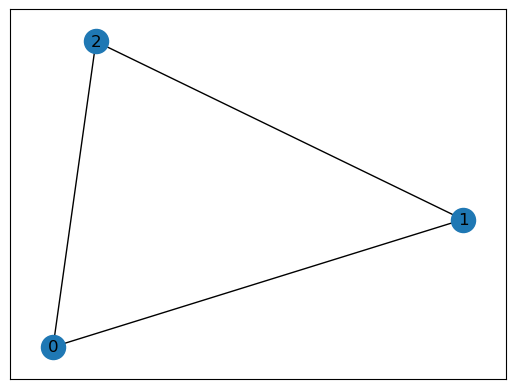

In [4]:
nx.draw_networkx(G0)

In [5]:
# 100 steps

In [6]:
G1 = nx.barabasi_albert_graph(n =100, m =3, initial_graph =G0)

In [7]:
deg=dict(G1.degree())

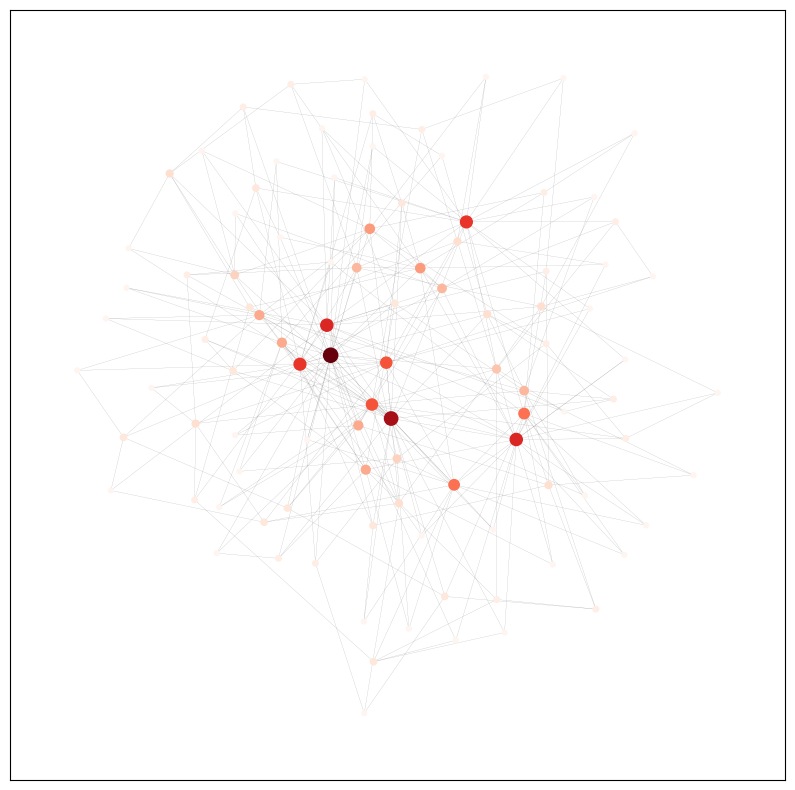

In [8]:
pos=nx.spring_layout(G1,k=1)
plt.figure(4,figsize=(10,10))
nx.draw_networkx(G1,
                node_size=[d*4 for d in deg.values()],
                node_color=list(deg.values()),
                cmap=plt.cm.Reds,
                edge_color='grey',
                width=0.1,
                with_labels = False)

In [9]:
# 1000 steps
G2 = nx.barabasi_albert_graph(n =1000, m =3, initial_graph =G1)

In [10]:
# 5000 steps
G4 = nx.barabasi_albert_graph(n =5000, m =3, initial_graph =G2)

In [11]:
# 10000 steps
G3 = nx.barabasi_albert_graph(n =10000, m =3, initial_graph =G4)

(a) Measure the degree distribution at intermediate steps, namely when the network has
100,1000 and 10000 nodes

In [12]:
fig = plt.figure("Degree of a BA graph", figsize=(8, 8))
axgrid = fig.add_gridspec(24, 4)

<Figure size 800x800 with 0 Axes>

In [13]:
# 100 steps
degree_sequence1 = sorted((d for n, d in G1.degree()), reverse=True)
#dmax1 = max(degree_sequence)
#ax1.clear()
ax1 = fig.add_subplot(axgrid[:5, :])
ax1.bar(np.unique(degree_sequence1, return_counts=True)[0],np.unique(degree_sequence1, return_counts=True)[1]/100)
ax1.set_title("100 step Degree histogram")
ax1.set_xlabel("Degree")
ax1.set_ylabel("# of Nodes")

Text(0, 0.5, '# of Nodes')

In [14]:
# 1000 steps
degree_sequence2 = sorted((d for n, d in G2.degree()), reverse=True)
#dmax1 = max(degree_sequence)
ax2 = fig.add_subplot(axgrid[8:13, :])
ax2.bar(np.unique(degree_sequence2, return_counts=True)[0],np.unique(degree_sequence2, return_counts=True)[1]/1000)
ax2.set_title("1000 step Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

Text(0, 0.5, '# of Nodes')

In [15]:
# 10000 steps
degree_sequence3 = sorted((d for n, d in G3.degree()), reverse=True)
#dmax1 = max(degree_sequence)
ax3 = fig.add_subplot(axgrid[16:21, :])
ax3.bar(np.unique(degree_sequence3, return_counts=True)[0],np.unique(degree_sequence3, return_counts=True)[1]/10000)
ax3.set_title("10000 step Degree histogram")
ax3.set_xlabel("Degree")
ax3.set_ylabel("# of Nodes")

Text(0, 0.5, '# of Nodes')

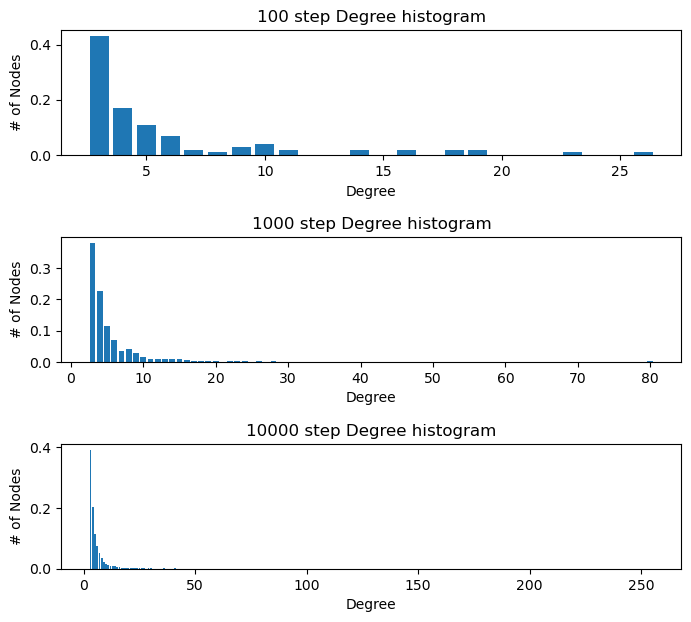

In [16]:
fig

In [17]:
fig2 = plt.figure("Degree of a BA graph", figsize=(18,4))
bxgrid = fig2.add_gridspec(4,24)

<Figure size 1800x400 with 0 Axes>

In [18]:
bx1 = fig2.add_subplot(bxgrid[:, :5])
bx1.loglog(np.unique(degree_sequence1, return_counts=True)[0],np.unique(degree_sequence1, return_counts=True)[1]/100,'bo')
bx1.set_title("100 step Degree histogram")
bx1.set_xlabel("Degree")
bx1.set_ylabel("# of Nodes")

Text(0, 0.5, '# of Nodes')

In [19]:
bx2 = fig2.add_subplot(bxgrid[:, 7:12])
bx2.loglog(np.unique(degree_sequence2, return_counts=True)[0],np.unique(degree_sequence2, return_counts=True)[1]/1000,'bo')
bx2.set_title("100 step Degree histogram")
bx2.set_xlabel("Degree")
bx2.set_ylabel("# of Nodes")

Text(0, 0.5, '# of Nodes')

In [20]:
bx3 = fig2.add_subplot(bxgrid[:, 14:19])
bx3.loglog(np.unique(degree_sequence3, return_counts=True)[0],np.unique(degree_sequence3, return_counts=True)[1]/10000,'bo')
bx3.set_title("100 step Degree histogram")
bx3.set_xlabel("Degree")
bx3.set_ylabel("# of Nodes")

Text(0, 0.5, '# of Nodes')

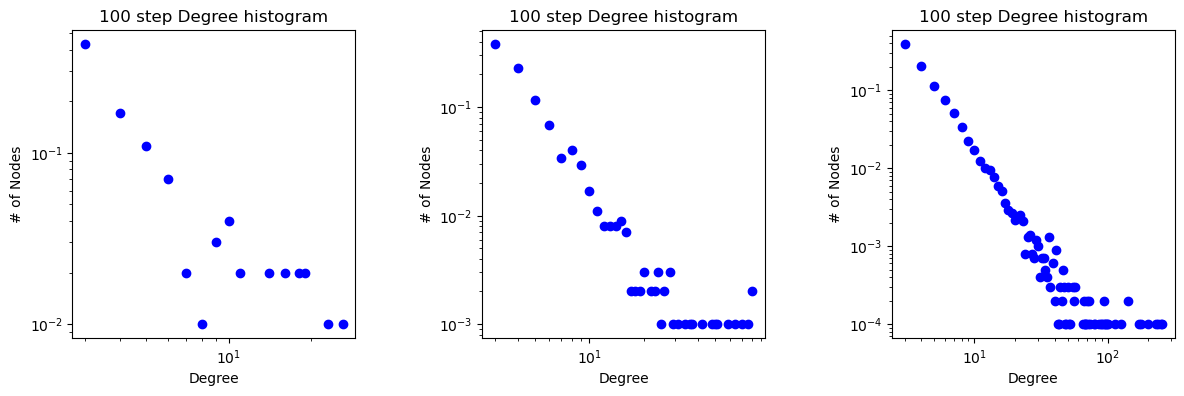

In [21]:
fig2

(b) Compare the distributions at these intermediate steps by plotting them together and
fitting each to a power-law with degree exponent $ \gamma $. Do the distributions “converge”?

In [22]:
x1 = np.arange(1, 1 + np.max(np.unique(degree_sequence1, return_counts=True)[0]))
x2 = np.arange(1, 1 + np.max(np.unique(degree_sequence2, return_counts=True)[0]))
x3 = np.arange(1, 1 + np.max(np.unique(degree_sequence3, return_counts=True)[0]))

Degree distribution of BA model from Continuum theory

$p(k) \approx 2m^{1/ \beta}k^{-\gamma}$

In [23]:
#parameter for theoretical degree distribution
m = 3
beta = 0.5
gamma = 1/beta +1

In [24]:
p1 = 2*m**(1/beta)*x1**(-gamma)
ax1.plot(p1, c = 'r')
ax1.set_ylim([0,0.5])

(0.0, 0.5)

In [25]:
p2 = 2*m**(1/beta)*x2**(-gamma)
ax2.plot(p1, c = 'r')
ax2.set_ylim([0,0.5])

(0.0, 0.5)

In [26]:
p3 = 2*m**(1/beta)*x3**(-gamma)
ax3.plot(p1, c = 'r')
ax3.set_ylim([0,0.5])

(0.0, 0.5)

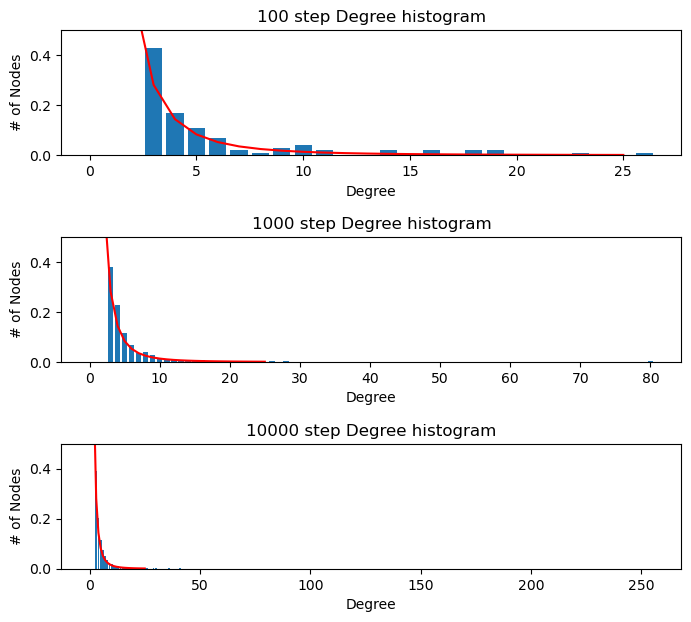

In [27]:
fig

In [28]:
bx1.loglog(p1, c = 'r')
#bx1.set_ylim([0,1])
bx2.loglog(p2, c = 'r')
bx3.loglog(p3, c = 'r')

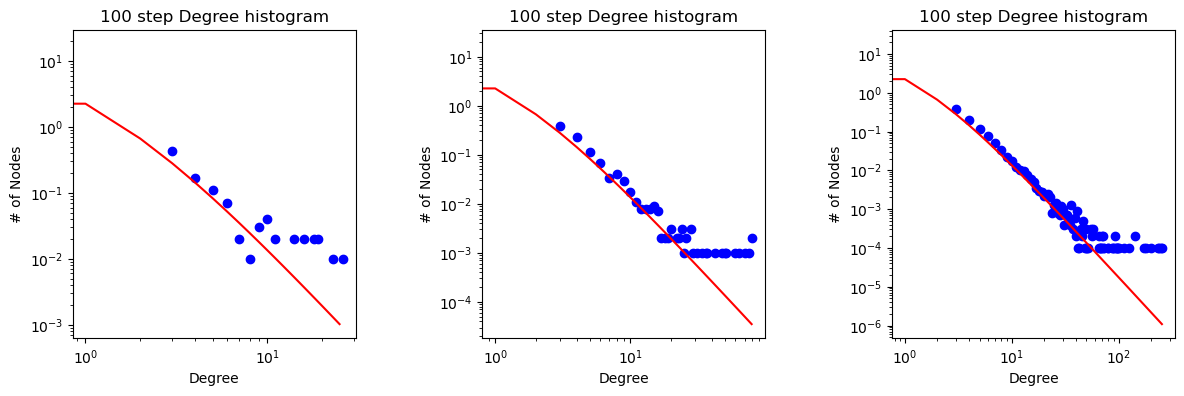

In [29]:
fig2

distribution is converges to theoretical value as well

(c) Plot together the cumulative degree distributions at intermediate steps.

In [36]:
fig3 = plt.figure("Degree of a BA graph", figsize=(18,4))
cxgrid = fig3.add_gridspec(4,24)

<Figure size 1800x400 with 0 Axes>

In [37]:
# 100 step
degreeCount = collections.Counter(degree_sequence1)
deg, cnt = zip(*degreeCount.items())
# deg = np.array(deg)
deg = deg[::-1]

cs = np.cumsum(cnt)/100
cs = cs[::-1]

cd = np.zeros(101)
j = 0
for i in range(101) :
    if j == len(deg) :
#         print(i,j)
        break
    cd[i] = cs[j]
    if i == deg[j] :
        j += 1
        
cx1 = fig3.add_subplot(cxgrid[:, :5])
cx1.loglog(range(len(cd)), cd, 'b-')
cx1.set_title("100 step Cumulative Distribution plot")
cx1.set_xlabel("Degree")
cx1.set_ylabel("Probability")

Text(0, 0.5, 'Probability')

In [39]:
# # 100 steps
# degreeCount = collections.Counter(degree_sequence1)
# deg, cnt = zip(*degreeCount.items())
# cs = np.cumsum(cnt)/100
# cx1 = fig3.add_subplot(cxgrid[:, :5])
# cx1.loglog(deg, cs, 'bo')
# cx1.set_title("100 step Cumulative Distribution plot")
# cx1.set_xlabel("Degree")
# cx1.set_ylabel("Probability")

Text(0, 0.5, 'Probability')

In [39]:
# 1000steps
degreeCount = collections.Counter(degree_sequence2)
deg, cnt = zip(*degreeCount.items())
# deg = np.array(deg)
deg = deg[::-1]

cs = np.cumsum(cnt)/1000
cs = cs[::-1]

cd = np.zeros(1001)
j = 0
for i in range(1001) :
    if j == len(deg) :
#         print(i,j)
        break
    cd[i] = cs[j]
    if i == deg[j] :
        j += 1
        
cx2 = fig3.add_subplot(cxgrid[:,7:12])
cx2.loglog(range(len(cd)), cd, 'b-')
cx2.set_title("1000 step Cumulative Distribution plot")
cx2.set_xlabel("Degree")
cx2.set_ylabel("Probability")

Text(0, 0.5, 'Probability')

In [97]:
# 1000 steps
# degreeCount = collections.Counter(degree_sequence2)
# deg, cnt = zip(*degreeCount.items())
# cs = np.cumsum(deg)/np.sum(deg)
# cx2 = fig3.add_subplot(cxgrid[:,7:12])
# cx2.loglog(deg, cs, 'bo')
# cx2.set_title("1000 step Cumulative Distribution plot")
# cx2.set_xlabel("Degree")
# cx2.set_ylabel("Probability")

Text(0, 0.5, 'Probability')

In [41]:
# 10000steps
degreeCount = collections.Counter(degree_sequence2)
deg, cnt = zip(*degreeCount.items())
# deg = np.array(deg)
deg = deg[::-1]

cs = np.cumsum(cnt)/10000
cs = cs[::-1]

cd = np.zeros(10001)
j = 0
for i in range(10001) :
    if j == len(deg) :
#         print(i,j)
        break
    cd[i] = cs[j]
    if i == deg[j] :
        j += 1
        
cx3 = fig3.add_subplot(cxgrid[:,14:19])
cx3.loglog(range(len(cd)), cd, 'b-')
cx3.set_title("10000 step Cumulative Distribution plot")
cx3.set_xlabel("Degree")
cx3.set_ylabel("Probability")

Text(0, 0.5, 'Probability')

In [98]:
# 10000 steps
# degreeCount = collections.Counter(degree_sequence3)
# deg, cnt = zip(*degreeCount.items())
# cs = np.cumsum(deg)/np.sum(deg)
# cx3 = fig3.add_subplot(cxgrid[:,14:19])
# cx3.loglog(deg, cs, 'bo')
# cx3.set_title("10000 step Cumulative Distribution plot")
# cx3.set_xlabel("Degree")
# cx3.set_ylabel("Probability")

Text(0, 0.5, 'Probability')

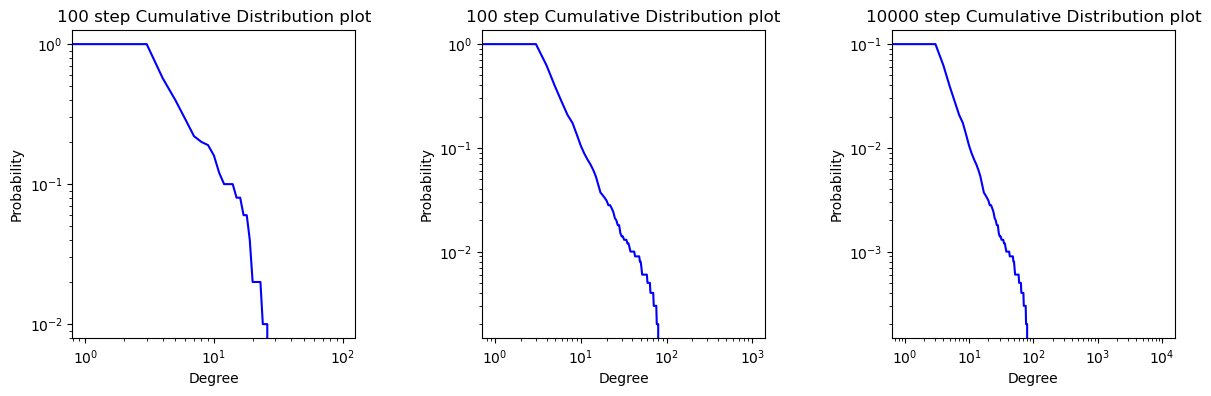

In [42]:
fig3

(d) Measure the average clustering coefficient in function of N

(e) Following Figure 5.6a, measure the degree dynamics of one of the initial nodes and of
the nodes added to the network at time t = 100, t = 1, 000 and t = 5, 000.


In [143]:
step = 10000
k1 = np.zeros(step+1) # initiail
k2 = np.zeros(step+1) # 100th
k3 = np.zeros(step+1)# 1000th
k4 = np.zeros(step+1) # 5000th

In [144]:
# initial network
G0 = nx.complete_graph(n =3)

In [145]:
n0 = 3
for i in range(n0+1,step+1):
    G = nx.barabasi_albert_graph(n =i, m =3, initial_graph =G0)
    G0 = G
    deg=dict(G.degree())
    nx.set_node_attributes(G,deg,'DEG')
    k1[i] = G.nodes[0]['DEG']
    if i > 100 :
        k2[i] = G.nodes[100]['DEG']
    if i > 1000 :
        k3[i] = G.nodes[1000]['DEG']
    if i > 5000 :
        k4[i] = G.nodes[5000]['DEG']

        

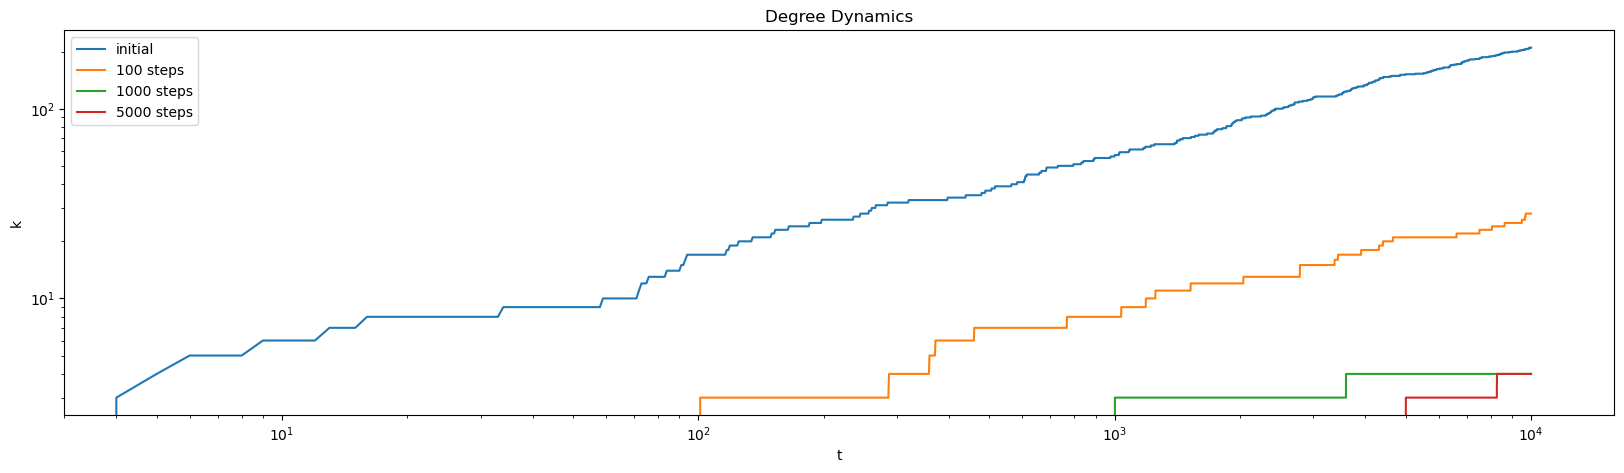

In [146]:
plt.figure(figsize = (20,5) )
plt.loglog(k1,label = 'initial')
plt.loglog(k2, label = '100 steps')
plt.loglog(k3, label = '1000 steps')
plt.loglog(k4, label = '5000 steps')
plt.title("Degree Dynamics")
plt.xlabel("t")
plt.xlim(xmin = 3)
plt.ylabel("k")
plt.legend()
plt.show()